In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [40]:
!ls "/content/drive/My Drive/DeepLearning-AyyuceHoca/results"

model.h5  __results___files  test.hdf5	train.hdf5  val.hdf5


In [46]:
# Reading the file

file_name = "/content/drive/My Drive/DeepLearning-AyyuceHoca/results/train.hdf5"
import h5py

f = h5py.File(file_name, "r")



In [4]:
# Importing necessary librarries


import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,BatchNormalization
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


In [5]:
# And we have 7 classes
# set epochs and batch size

num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 25

In [71]:
with open("/content/drive/My Drive/DeepLearning-AyyuceHoca/fer2013.csv") as f:
  content = f.readlines()

lines = np.array(content)

In [72]:
num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [ ]:
lines[2].split(",")

['0',
 '151 150 147 155 148 133 111 140 170 174 182 154 153 164 173 178 185 185 189 187 186 193 194 185 183 186 180 173 166 161 147 133 172 151 114 161 161 146 131 104 95 132 163 123 119 129 140 120 151 149 149 153 137 115 129 166 170 181 164 143 157 156 169 179 185 183 186 186 184 190 191 184 186 190 183 175 168 160 147 136 135 167 136 108 153 167 149 137 111 90 134 162 121 122 141 137 151 151 156 143 116 124 159 164 174 169 135 144 155 153 164 170 176 178 177 178 187 185 181 182 183 181 178 170 164 158 148 144 130 136 173 130 97 137 167 157 138 113 90 138 168 109 123 146 151 152 155 127 113 159 167 170 171 142 131 140 154 162 168 169 169 164 168 173 176 179 178 176 173 172 170 161 154 152 146 145 137 124 130 171 124 102 133 164 152 138 110 86 154 149 100 139 153 151 136 113 142 159 161 174 150 127 136 140 154 164 163 167 173 172 171 170 167 168 172 167 162 161 160 163 163 154 145 146 140 133 122 135 167 127 101 126 164 147 132 95 91 166 115 113 158 143 121 134 153 153 164 162 131 130

In [73]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
     
    except:
      print("", end="")

In [77]:
#------------------------------
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')


In [79]:
x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


25264 train samples
3589 test samples


In [ ]:
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48,48,1),padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2),padding="same"))
model.add(Dropout(0.2))

#2nd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2),))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2),))
model.add(Dropout(0.2))


model.add(Flatten())


model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(num_classes, activation='softmax'))

#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)


#------------------------------
model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_399 (Conv2D)          (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_400 (Conv2D)          (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_242 (Bat (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_159 (MaxPoolin (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_209 (Dropout)        (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_401 (Conv2D)          (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_243 (Bat (None, 23, 23, 128)     

In [ ]:
fit = True

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=113, epochs=epochs) #train for randomly selected one
else:
	model.load_weights('/data/facial_expression_model_weights.h5') #load weights


Epoch 1/25
113/113 [==============================] - 32s 287ms/step - loss: 1.9739 - accuracy: 0.2231
Epoch 2/25
113/113 [==============================] - 33s 288ms/step - loss: 1.7523 - accuracy: 0.2806
Epoch 3/25
113/113 [==============================] - 33s 289ms/step - loss: 1.5580 - accuracy: 0.3826
Epoch 4/25
113/113 [==============================] - 33s 288ms/step - loss: 1.4187 - accuracy: 0.4478
Epoch 5/25
113/113 [==============================] - 33s 288ms/step - loss: 1.3119 - accuracy: 0.4979
Epoch 6/25
113/113 [==============================] - 33s 288ms/step - loss: 1.2385 - accuracy: 0.5297
Epoch 7/25
113/113 [==============================] - 33s 289ms/step - loss: 1.1812 - accuracy: 0.5525
Epoch 8/25
113/113 [==============================] - 33s 289ms/step - loss: 1.1275 - accuracy: 0.5768
Epoch 9/25
113/113 [==============================] - 33s 288ms/step - loss: 1.0805 - accuracy: 0.5967
Epoch 10/25
113/113 [==============================] - 33s 288ms/step - l

In [ ]:
root = "/content/drive/My Drive"
checkpointter = tf.keras.callbacks.ModelCheckpoint(filepath=root+"/facial_expression_model_weights.h5",verbose=1,save_best_only=True)
 
hist = model.fit(x_train,y_train,
                 epochs=epochs,
                 shuffle=True,
                 batch_size=batch_size,
                 validation_data=(x_test,y_test),
                 callbacks=[checkpointter],
                 verbose=2)

Epoch 1/25

Epoch 00001: val_loss improved from inf to 1.72161, saving model to /content/drive/My Drive/facial_expression_model_weights.h5
113/113 - 34s - loss: 0.3508 - accuracy: 0.8773 - val_loss: 1.7216 - val_accuracy: 0.5985
Epoch 2/25

Epoch 00002: val_loss improved from 1.72161 to 1.68847, saving model to /content/drive/My Drive/facial_expression_model_weights.h5
113/113 - 34s - loss: 0.3237 - accuracy: 0.8901 - val_loss: 1.6885 - val_accuracy: 0.6347
Epoch 3/25

Epoch 00003: val_loss improved from 1.68847 to 1.49796, saving model to /content/drive/My Drive/facial_expression_model_weights.h5
113/113 - 34s - loss: 0.2962 - accuracy: 0.8970 - val_loss: 1.4980 - val_accuracy: 0.6194
Epoch 4/25

Epoch 00004: val_loss did not improve from 1.49796
113/113 - 33s - loss: 0.2696 - accuracy: 0.9093 - val_loss: 1.6551 - val_accuracy: 0.6339
Epoch 5/25

Epoch 00005: val_loss did not improve from 1.49796
113/113 - 33s - loss: 0.2441 - accuracy: 0.9165 - val_loss: 1.8487 - val_accuracy: 0.6233

In [ ]:
#Evaluation 1 
# with imagegenerator

train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.3725247085094452
Train accuracy: 87.49520778656006
Test loss: 1.4328298568725586
Test accuracy: 62.301474809646606


In [ ]:
#Evaluation 2
# Without Imagegenerator

train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.08906181901693344
Train accuracy: 96.9904899597168
Test loss: 2.069514274597168
Test accuracy: 63.722485303878784


In [ ]:
!ls  "/content/drive/My Drive"

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


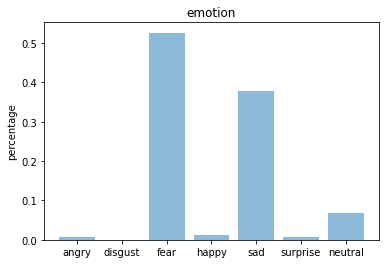

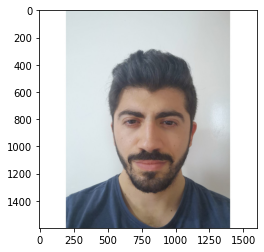

In [ ]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = "/content/drive/My Drive/deneme2.jpg"
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()